In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
INPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/fortuit/'
temp = pd.read_csv(INPUT_FOLDER + 'temperature_fr.csv')
unavail_unplanned_outages = pd.read_csv(INPUT_FOLDER + 'unplanned_outages__unavail_ts.csv')
selection_unplanned_outages = pd.read_csv(INPUT_FOLDER + 'unplanned_outages__units_selection.csv')
units_unplanned_outages = pd.read_csv(INPUT_FOLDER + 'unplanned_outages__units_all.csv')

                   date_time  Temperature   normale
0       1995-12-31T23:00:00Z     6.700000  4.000000
1       1996-01-01T00:00:00Z     6.566667  3.866667
2       1996-01-01T01:00:00Z     6.433333  3.733333
3       1996-01-01T02:00:00Z     6.300000  3.600000
4       1996-01-01T03:00:00Z     6.233333  3.533333
...                      ...          ...       ...
203780  2019-03-31T19:00:00Z    11.090650  8.120000
203781  2019-03-31T20:00:00Z    11.564700  7.913333
203782  2019-03-31T21:00:00Z    12.038750  7.706667
203783  2019-03-31T22:00:00Z    12.512800  7.500000
203784  2019-03-31T23:00:00Z    11.562600  4.000000

[203785 rows x 3 columns]
166561    2015-01-01T00:00:00Z
166562    2015-01-01T01:00:00Z
166563    2015-01-01T02:00:00Z
166564    2015-01-01T03:00:00Z
166565    2015-01-01T04:00:00Z
                  ...         
175322    2016-01-01T01:00:00Z
175323    2016-01-01T02:00:00Z
175324    2016-01-01T03:00:00Z
175325    2016-01-01T04:00:00Z
175326    2016-01-01T05:00:00Z
Name: da

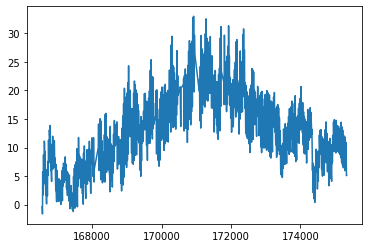

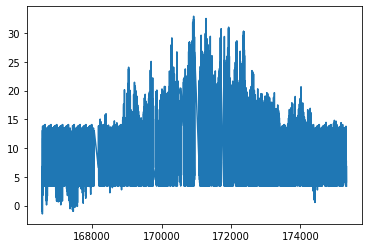

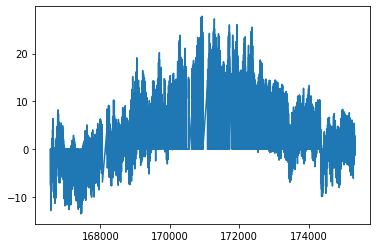

In [18]:
print(temp)
deb = (2014 - 1995)*8766 + 7
fin = (2015 - 1995)*8766 + 7
print(temp[deb: fin]['date_time'])
plt.plot(temp[deb:fin][['Temperature']])
plt.show()
plt.plot(temp[deb:fin][['normale']])
plt.show()
plt.plot(temp[deb:fin]['Temperature'] - temp[deb:fin]['normale'])

### Regroupement des données de fortuits d'indisponibilités

In [19]:
print(unavail_unplanned_outages)

                         date      name  unavail_power
0        2015-01-01T00:00:00Z     AIGLE            0.0
1        2015-01-01T01:00:00Z     AIGLE            0.0
2        2015-01-01T02:00:00Z     AIGLE            0.0
3        2015-01-01T03:00:00Z     AIGLE            0.0
4        2015-01-01T04:00:00Z     AIGLE            0.0
...                       ...       ...            ...
3959628  2018-12-30T20:00:00Z  SISTERON            0.0
3959629  2018-12-30T21:00:00Z  SISTERON            0.0
3959630  2018-12-30T22:00:00Z  SISTERON            0.0
3959631  2018-12-30T23:00:00Z  SISTERON            0.0
3959632  2018-12-31T00:00:00Z  SISTERON            0.0

[3959633 rows x 3 columns]


In [20]:
print(selection_unplanned_outages)

               name productionType  nominalPower
0          BLENOD 5     Fossil Gas           427
1        BOUCHAIN 7     Fossil Gas           585
2    COMBIGOLFE CCG     Fossil Gas           425
3     Croix-de-Metz     Fossil Gas           413
4       CYCOFOS PL1     Fossil Gas           428
..              ...            ...           ...
108    ST LAURENT 2        Nuclear           915
109     TRICASTIN 1        Nuclear           915
110     TRICASTIN 2        Nuclear           915
111     TRICASTIN 3        Nuclear           915
112     TRICASTIN 4        Nuclear           915

[113 rows x 3 columns]


In [21]:
units_unplanned_outages = units_unplanned_outages.rename(columns={'registeredResourceName':'name'})
print(units_unplanned_outages)
print(units_unplanned_outages['productionType'].nunique())

    powerSystemResourcesName             name         productionType  \
0                    AIGLE 6            AIGLE  Hydro Water Reservoir   
1                   ARAMON 1         ARAMON 1             Fossil Oil   
2                  ARRIGHI 1        ARRIGHI 1             Fossil Oil   
3                  ARRIGHI 2        ARRIGHI 2             Fossil Oil   
4                   BATHIE 1           BATHIE  Hydro Water Reservoir   
..                       ...              ...                    ...   
147                      NaN            COCHE   Hydro Pumped Storage   
148                      NaN    Croix-de-Metz             Fossil Gas   
149                      NaN        MALGOVERT  Hydro Water Reservoir   
150                      NaN  Pont-sur-Sambre             Fossil Gas   
151                      NaN         VOUGLANS  Hydro Water Reservoir   

     nominalPowerGen  nominalPowerProd  
0              146.0             360.0  
1              685.0               NaN  
2           

In [22]:
unplanned_outages = unavail_unplanned_outages.merge(units_unplanned_outages, on=['name', 'name'], how='left')[['date', 'name', 'unavail_power', 'productionType', 'powerSystemResourcesName']]

In [23]:
print(unplanned_outages)
print(unplanned_outages['productionType'].isna().sum())

                         date      name  unavail_power         productionType  \
0        2015-01-01T00:00:00Z     AIGLE            0.0  Hydro Water Reservoir   
1        2015-01-01T01:00:00Z     AIGLE            0.0  Hydro Water Reservoir   
2        2015-01-01T02:00:00Z     AIGLE            0.0  Hydro Water Reservoir   
3        2015-01-01T03:00:00Z     AIGLE            0.0  Hydro Water Reservoir   
4        2015-01-01T04:00:00Z     AIGLE            0.0  Hydro Water Reservoir   
...                       ...       ...            ...                    ...   
4204915  2018-12-30T22:00:00Z  SISTERON            0.0  Hydro Water Reservoir   
4204916  2018-12-30T23:00:00Z  SISTERON            0.0  Hydro Water Reservoir   
4204917  2018-12-30T23:00:00Z  SISTERON            0.0  Hydro Water Reservoir   
4204918  2018-12-31T00:00:00Z  SISTERON            0.0  Hydro Water Reservoir   
4204919  2018-12-31T00:00:00Z  SISTERON            0.0  Hydro Water Reservoir   

        powerSystemResource

In [28]:
# unplanned_outages.set_index(['date', 'productionType'], inplace=True)
unplanned_outages = unplanned_outages[ ~unplanned_outages['productionType'].isna() ]
unplanned_grouped = unplanned_outages[['date', 'productionType', 'unavail_power']].groupby(['productionType', 'date'], dropna=False).sum()
#print(unplanned_grouped)
print(unplanned_grouped)
unplanned_grouped.reset_index(inplace=True)
#plt.plot(unplanned_grouped[ unplanned_grouped['productionType'] == 'Nuclear']['unavail_power'])
print(unplanned_grouped)

                                     unavail_power
productionType date                               
Fossil Gas     2015-01-01T00:00:00Z            0.0
               2015-01-01T01:00:00Z            0.0
               2015-01-01T02:00:00Z            0.0
               2015-01-01T03:00:00Z            0.0
               2015-01-01T04:00:00Z            0.0
...                                            ...
Nuclear        2018-12-30T20:00:00Z          815.0
               2018-12-30T21:00:00Z          815.0
               2018-12-30T22:00:00Z          815.0
               2018-12-30T23:00:00Z          815.0
               2018-12-31T00:00:00Z          815.0

[175205 rows x 1 columns]
       productionType                  date  unavail_power
0          Fossil Gas  2015-01-01T00:00:00Z            0.0
1          Fossil Gas  2015-01-01T01:00:00Z            0.0
2          Fossil Gas  2015-01-01T02:00:00Z            0.0
3          Fossil Gas  2015-01-01T03:00:00Z            0.0
4          Foss

In [29]:
unplanned_grouped.to_csv('C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/data/' + 'rda_unplanned.csv')

## Presentation

In [ ]:
import matplotlib.patches as pat
# Compute supply and demand curve
fig = plt.figure()

prod = [0, 15, 15, 25, 25, 35, 35, 42, 42, 46, 46]
price = [5, 5, 10, 10, 12, 12, 15, 15, 24, 24, 26]
plt.xlim([0, 46])
plt.ylim([0, 26])
plt.xlabel('Production')
plt.ylabel('Price')
plt.vlines(38, 0, 26, color='r', linestyles='dashed', label=' Inelastic Demand')
plt.plot(prod, price, label='Supply', linewidth=2, color='green')
plt.legend(loc='upper left')

left_begin = sorted(list(set(prod)))[:-1]
width = [prod[i+1] - prod[i] for i in range(len(prod)-1) if prod[i+1] - prod[i] != 0]
height = [price[i] for i in range(len(price)-1) if price[i+1] - price[i] != 0]
colors = ['red', 'blue', 'black', 'gray', 'orange']
tech = ['Nuclear', 'Hydro', 'Coal', 'Fuel', 'Oth.']

for rg, left in enumerate(left_begin):
    r = pat.Rectangle((left,0), width[rg], height[rg], color=colors[rg])
    fig.gca().add_patch(r)
    
    if rg == len(left_begin) - 1:
        left -= 1
    
    plt.annotate(tech[rg], (left + width[rg]/4, height[rg]//2), color='white', fontsize=14)

plt.show()